In [1]:
%pip install pandas
%pip install numpy

  Using cached pandas-2.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib
%pip install seaborn
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached tenacity-8.3.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
Using cached tenacity-8.3.0-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,NaN,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [43]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1


In [44]:
df.tail(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0


In [45]:
print(df.dtypes)

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object


In [53]:
# Null Values

print(df.isnull().sum())

Pregnancies                 1
Glucose                     3
BloodPressure               3
SkinThickness               2
Insulin                     3
BMI                         2
DiabetesPedigreeFunction    2
Age                         1
Outcome                     0
dtype: int64


In [54]:
df_cleaned = df.dropna()
print(f"Data shape after dropping rows with null values: {df_cleaned.shape}")

Data shape after dropping rows with null values: (751, 9)


In [55]:
print(df_cleaned.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [56]:
# Exploratory Data Analysis (EDA)

print(df_cleaned.groupby('Outcome')['BMI'].describe())

         count       mean       std  min     25%   50%    75%   max
Outcome                                                            
0        487.0  30.316427  7.581297  0.0  25.350  30.0  35.25  57.3
1        264.0  35.024621  7.213019  0.0  30.725  34.2  38.50  67.1


In [57]:
diabetic = df_cleaned[df_cleaned['Outcome'] == 1]['BMI']
non_diabetic = df_cleaned[df_cleaned['Outcome'] == 0]['BMI']

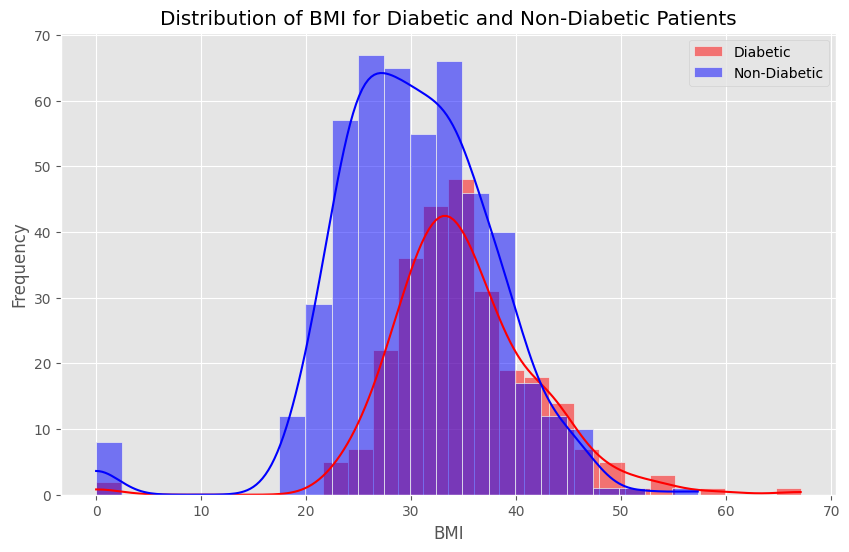

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(diabetic, color='red', label='Diabetic', kde=True)
sns.histplot(non_diabetic, color='blue', label='Non-Diabetic', kde=True)
plt.title('Distribution of BMI for Diabetic and Non-Diabetic Patients')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

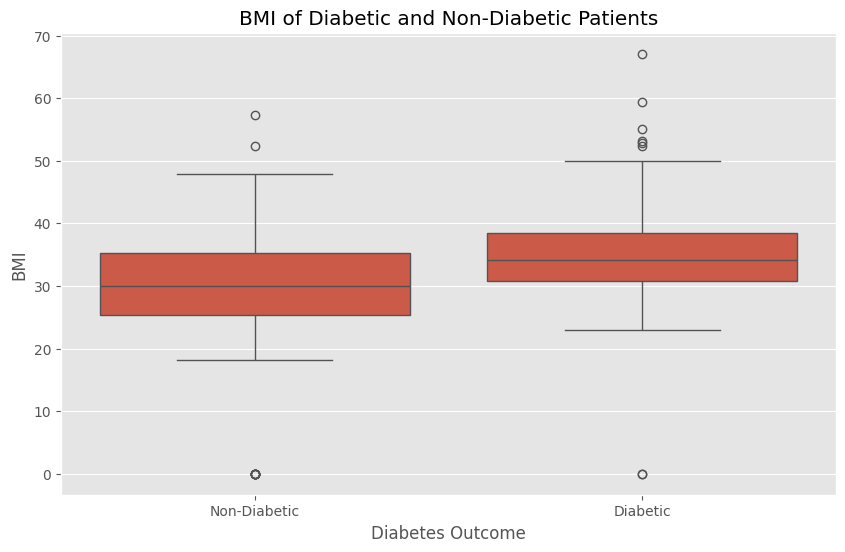

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df_cleaned)
plt.title('BMI of Diabetic and Non-Diabetic Patients')
plt.xlabel('Diabetes Outcome')
plt.ylabel('BMI')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

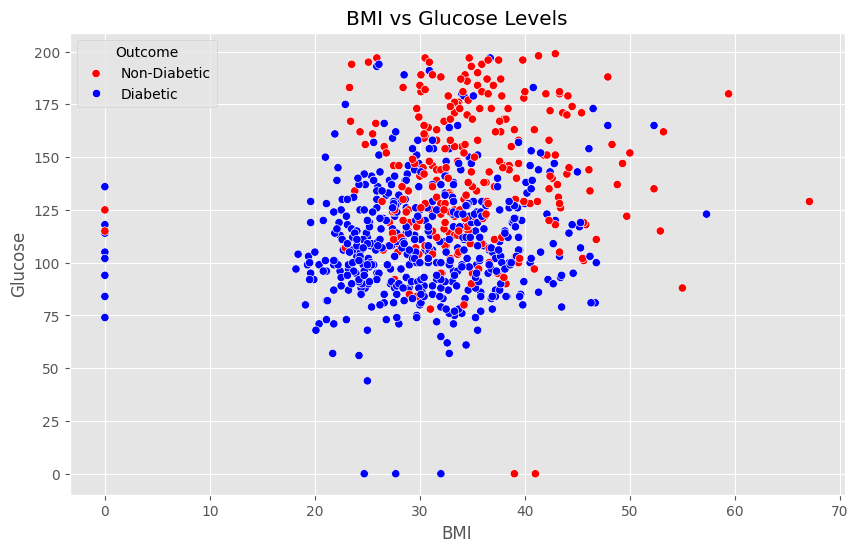

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df_cleaned, palette={0: 'blue', 1: 'red'})
plt.title('BMI vs Glucose Levels')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.show()